In [2]:
import pandas as pd
from IPython.display import display
from bleach import clean

In [3]:
apt_list = pd.read_csv('Booli_sold.csv')
apt_list

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/


In [4]:
ppsqm = apt_list['soldPrice'] / apt_list['livingArea'] # calculate price per square meter for all apartments
apt_list['ppsqm'] = ppsqm # add the price per square meter column to the dataframe
avg_ppsqm = apt_list['ppsqm'].mean() # calculate the average price per square meter for all apartments
print(f"The average price per square meter for all apartments is: {avg_ppsqm:.2f}")
apt_list.head() # display the first 5 rows of the dataframe

The average price per square meter for all apartments is: 58759.38


,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/,52328.767123
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,65416.666667
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/,75432.098765
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,75233.644860
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,82758.620690


In [5]:
cleaned_apt_list = apt_list[['location.address.streetAddress', 'listPrice', 'livingArea', 'ppsqm']]
cleaned_apt_list.sort_values('ppsqm', ascending=False).head()


,location.address.streetAddress,listPrice,livingArea,ppsqm
67,Ekhagsvägen 8,1595000,24.0,104166.666667
50,Ekhagsvägen 8,1890000,24.0,102083.333333
54,Ekhagsvägen 10,1795000,23.0,100000.000000
34,Torphagsvägen 4,1750000,25.0,88400.000000
55,Docentbacken 1B,1895000,26.9,85501.858736


In [6]:
filtered_apt_list = cleaned_apt_list[cleaned_apt_list['location.address.streetAddress'].str.startswith('Ekhagsvägen')]
filtered_apt_list.sort_values('ppsqm', ascending=False)
ekhags_average_ppsqm = filtered_apt_list['ppsqm'].mean()
print(f"The average price per square meter for apartments on Ekhagsvägen is: {ekhags_average_ppsqm:.2f}")

The average price per square meter for apartments on Ekhagsvägen is: 60636.48


In [7]:
hot_potato = apt_list[['location.address.streetAddress', 'listPrice', 'soldPrice', 'published', 'soldDate']].copy()
hot_potato['change']  = hot_potato['soldPrice'] - hot_potato['listPrice']
hot_potato['days_to_sell'] = (pd.to_datetime(hot_potato['soldDate']) - pd.to_datetime(hot_potato['published']).dt.normalize()).dt.days
longest_days_to_sell = hot_potato.sort_values('days_to_sell', ascending=False).head(1)
shortest_days_to_sell = hot_potato.sort_values('days_to_sell', ascending=True).head(1)
avg_time_to_sell = hot_potato['days_to_sell'].mean()
print(f" The average time to sell an apartment is: {avg_time_to_sell:.2f} days")
display(longest_days_to_sell)
display(shortest_days_to_sell)


 The average time to sell an apartment is: 23.06 days


,location.address.streetAddress,listPrice,soldPrice,published,soldDate,change,days_to_sell
129,Torphagsvägen 24,2495000,2495000,2013-09-27 12:19:24,2014-02-10,0,136


,location.address.streetAddress,listPrice,soldPrice,published,soldDate,change,days_to_sell
79,Docentbacken 3,6000000,6000000,2015-10-29 00:13:37,2015-10-29,0,0


Neither the fastest nor slowest selling apartment had a change in price. The fastest selling apartment was sold on the same day it was published, while the slowest selling apartment took 136 days to sell. The average time to sell an apartment is 23.06 days according to the data. What is odd is selling an apartment on the same day it was published, with no changes in price. Could be a data entry error or someone who was in a hurry to sell their apartment. 
Considering the fact that plenty other apartments who hadn't sold for weeks or months had a change in price, it is odd that the slowest selling apartment was sold at the same price it was listed for.  This could be due to the apartment being overpriced, or the seller not being in a hurry to sell the apartment.

In [8]:
df = pd.read_csv('2018_R_per_kommun.csv', sep=';', decimal=',', encoding='utf-8')
stockholm_votes = df[df['LÄNSNAMN'] == 'Stockholms län']
stockholm_votes = stockholm_votes[['KOMMUNNAMN', 'RÖSTBERÄTTIGADE', 'RÖSTANDE', 'RÖSTER GILTIGA']]
stockholm_votes_legit_tot = stockholm_votes["RÖSTER GILTIGA"].sum()
print(f" Total number of legitimate votes in Stockholm :{stockholm_votes_legit_tot}")


 Total number of legitimate votes in Stockholm :1426237


In [9]:
highest_S_percentage = df.sort_values('S', ascending=False).head(1)
S_kommun = highest_S_percentage['KOMMUNNAMN'] 
print(f" The municipality with the highest voter of Socialdemokrater percentage is : {S_kommun.values[0]} ")

 The municipality with the highest voter of Socialdemokrater percentage is : Munkfors 


In [10]:
top_three_participation = df[['LÄNSNAMN','KOMMUNNAMN', 'VALDELTAGANDE']]
top_three_participation.sort_values('VALDELTAGANDE', ascending=False).head(3)


,LÄNSNAMN,KOMMUNNAMN,VALDELTAGANDE
103,Skåne län,Lomma,93.86
59,Jönköpings län,Habo,93.35
98,Skåne län,Vellinge,93.13


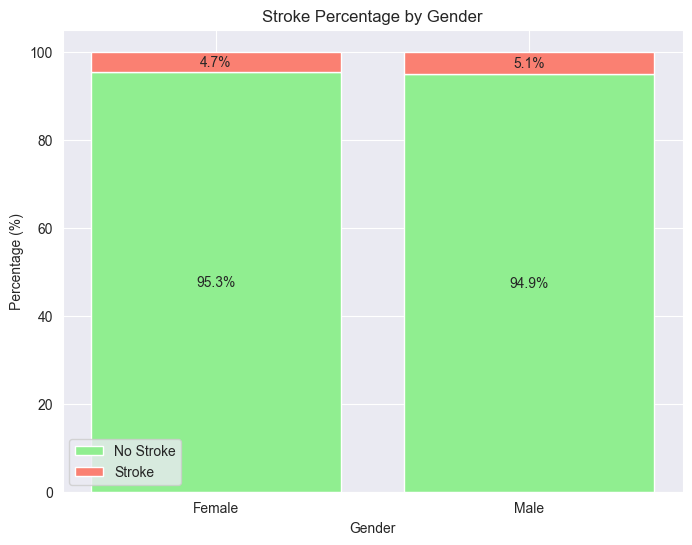

In [11]:
import matplotlib.pyplot as plt 
df = pd.read_csv('stroke-data.csv', sep=',', decimal='.', encoding='utf-8')
df = df[df['gender'] != 'Other']
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'total_count']
total_individuals = gender_counts['total_count'].sum()
gender_counts['gender_ratio'] = (gender_counts['total_count'] / total_individuals) * 100

stroke_data = df.groupby(['gender', 'stroke']).size().reset_index(name='count')

stroke_pivot = stroke_data.pivot(index='gender', columns='stroke', values='count').reset_index()
stroke_pivot = stroke_pivot.fillna(0)
stroke_pivot.columns = ['gender', 'No Stroke', 'Stroke']
stroke_pivot['total'] = stroke_pivot['No Stroke'] + stroke_pivot['Stroke']
stroke_pivot['No Stroke %'] = (stroke_pivot['No Stroke'] / stroke_pivot['total']) * 100
stroke_pivot['Stroke %'] = (stroke_pivot['Stroke'] / stroke_pivot['total']) * 100
plt.figure(figsize=(8, 6))
plt.bar(stroke_pivot['gender'], stroke_pivot['No Stroke %'], label='No Stroke', color='lightgreen')
plt.bar(stroke_pivot['gender'], stroke_pivot['Stroke %'], bottom=stroke_pivot['No Stroke %'], label='Stroke', color='salmon')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Stroke Percentage by Gender')
for idx, row in stroke_pivot.iterrows():
    plt.text(idx, row['No Stroke %'] / 2, f"{row['No Stroke %']:.1f}%", ha='center', va='center')
    plt.text(idx, row['No Stroke %'] + (row['Stroke %'] / 2), f"{row['Stroke %']:.1f}%", ha='center', va='center')
plt.legend()
plt.show()

From the bar chart above, we can see that the percentage of individuals who had a stroke is almost the same for both
genders, with a slightly higher percentage for males. A possible conclusion could be that ones gender does not affect
the likelihood of having a stroke.